# A whirlwind tour of RDKit in the IPython notebook

Our first step is to import the module that we will be using:

In [1]:
from rdkit import Chem

Special imports for drawing molecules:

In [2]:
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults

Modify default molecule drawing settings:

In [3]:
DrawingOptions.bondLineWidth=1.8

Create a molecule object from a [SMILES string](http://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system):

In [4]:
ibu = Chem.MolFromSmiles('CC(C)Cc1ccc(cc1)C(C)C(=O)O')

Display the molecule in the notebook:

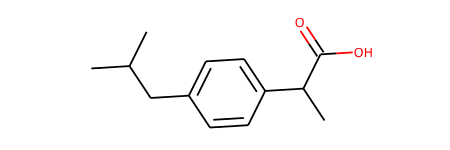

In [5]:
ibu

The molecule object can now be queried to get various properties

In [6]:
ibu.GetNumAtoms()

15

Anything seem wrong here? Let's print out a text representation of the molecule and take a closer look:

In [7]:
print Chem.MolToMolBlock(ibu)


     RDKit          

 15 15  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0

We see that the hydrogen atoms are *implicit* in this representation of the molecule. They were not included in the SMILES string and are still not present in the connection table.

In [8]:
DrawingOptions.includeAtomNumbers=True

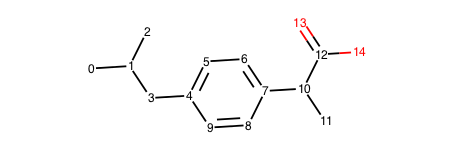

In [9]:
ibu

If we are interested in doing anything that requires atomic coordinates, we probably want an all-atom representation of the molecule. We can make the hydrogen atoms *explicit* by adding them (and creating a new molecule in the process). We need more functions than provided in the base `Chem` module, so we need to import the expanded functionality of `AllChem`.

In [10]:
from rdkit.Chem import AllChem

In [11]:
ibuH = AllChem.AddHs(ibu)

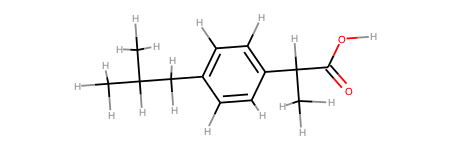

In [12]:
DrawingOptions.includeAtomNumbers=False
ibuH

In [13]:
print Chem.MolToMolBlock(ibuH)


     RDKit          

 33 33  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0

In [14]:
ibuH.GetNumAtoms()

33

Our all-atom represntation is now suitable for many purposes, such as calculating properties that depend only upon atom-types and connectivity. One of these is the total polar surface area (TPSA):

In [15]:
Chem.rdMolDescriptors.CalcTPSA(ibuH)

37.3

For other properties, we will need more information about our molecule.

We can save the molecule for later use in a python format called a pickle:

In [16]:
import cPickle as pickle

In [17]:
pickle.dump(ibuH, open('ibuH.pkl','wb'))